In [1]:
"""
This script creates a figure of the components 
of the 2D energy balance, date and altitude.
"""

import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from my_fun.create_date import create_date
from my_fun.hour_to_day_mean import hour_to_day_mean
from my_fun.nan_helper import nan_helper


In [2]:
filename_nc  = '../../data/output/Peru_out_1_20160901-20170831.nc'
dir_graphics   = 'out'
name_fig     = 'SEB_time_ele'


In [3]:
ds = xr.open_dataset(filename_nc)

time_nc = ds['time'].values
mask_nc = ds['MASK'].values
lat_nc  = ds['lat'].values        
lon_nc  = ds['lon'].values
dem_nc   = ds['HGT'].values
lat_n = len(lat_nc)
lon_n = len(lon_nc)
date_day = create_date(time_nc)


In [4]:
point_g = np.sum(mask_nc[mask_nc==1])
elev_g  = np.zeros((int(point_g),1))

z = 0
for i in range(lat_n):
    for j in range(lon_n):
            if mask_nc[i,j] == 1:
                var1 = dem_nc[i,j]
                elev_g[z,0] = var1
                z = z+1

elev_g_20 = np.arange(np.min(elev_g),np.max(elev_g),10) 

days_num = int(len(time_nc)/24)

var1a    = ds['G'].values
var1_d   = hour_to_day_mean(days_num,var1a)

var1a    = ds['ALBEDO'].values
var2_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var1 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_day1 = var2_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]*(1-var_nc_day1[i,j])
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var1[:,t] = var_01

var1a    = ds['LWin'].values
var1_d   = hour_to_day_mean(days_num,var1a)

var1a    = ds['LWout'].values
var2_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var2 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_day1 = var2_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j] + var_nc_day1[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var2[:,t] = var_01

var1a    = ds['H'].values
var1_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var3 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var3[:,t] = var_01

var1a    = ds['LE'].values
var1_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var4 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1a[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var4[:,t] = var_01

var1a    = ds['B'].values
var1_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var5 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var5[:,t] = var_01

var1a    = ds['ALBEDO'].values
var1_d   = hour_to_day_mean(days_num,var1a)

time_d,x,y = var1_d.shape

var6 = np.zeros((len(elev_g_20),time_d))

for t in range(time_d):
    var_nc_day  = var1_d[t,:,:]
    var_nc_z = np.zeros((len(elev_g),1))
    z = 0
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var_nc_z[z] = var_nc_day[i,j]
                    z = z+1                      
    vara1 = np.concatenate((elev_g, var_nc_z), axis=1)
    vara2 = vara1[np.lexsort(([vara1[:, i] for i in range(vara1.shape[1]-1, -1, -1)]))]
    a1 = 0
    a2 = 1
    var_01 = np.zeros((len(elev_g_20)))
    var_01[:] = np.nan   
    for i in range(len(var_01)-1):
        var_in = np.zeros((len(vara2)))
        var_in[:] = np.nan  
        for j in range(len(vara2)):
            if int(vara2[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
                var_in[j] = vara2[j,1]
        var_01[i] = np.nanmean(var_in)
        a1 = a1+1
        a2 = a2+1        
    for j in range(len(vara2)):
        if vara2[j,0] >= elev_g_20[a1]:
            var_in[j] = vara2[j,1] 
    var_01[-1] = np.nanmean(var_in)
    nans, x = nan_helper(var_01)
    var_01[nans]= np.interp(x(nans), x(~nans), var_01[~nans])
    var6[:,t] = var_01


/home/christian/Documents/pro_chris/cosipy_peru/postprocessing/post_cosipy/my_fun/hour_to_day_mean.py:16: RuntimeWarning: Mean of empty slice
  ME_day[t,:,:] = np.nanmean(var_nc,axis=0)
<ipython-input-4-032b4678a8c5>:48: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-4-032b4678a8c5>:91: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-4-032b4678a8c5>:130: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-4-032b4678a8c5>:169: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-4-032b4678a8c5>:208: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)
<ipython-input-4-032b4678a8c5>:247: RuntimeWarning: Mean of empty slice
  var_01[i] = np.nanmean(var_in)


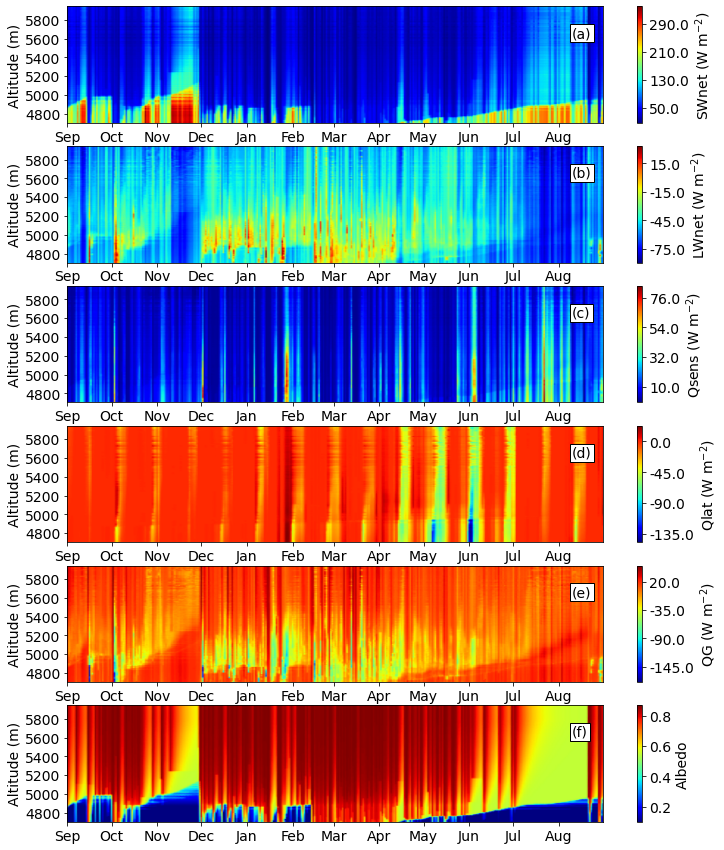

In [6]:
fig, (ax0, ax1, ax2, ax3, ax4 , ax5) = plt.subplots(6,1,figsize=(12,15))    

im0 = ax0.pcolormesh(date_day, elev_g_20, var1, cmap=plt.get_cmap('jet'),shading='gouraud')
lab_cbar = np.arange(-30,330,80)
fig.colorbar(im0,ax=ax0, label = 'SWnet (W m$^{-2}$)', format='%1.1f', ticks=lab_cbar)
ax0.set_ylim(np.min(elev_g_20), np.max(elev_g_20))
ax0.set_yticks(np.arange(4800, 6000, 200))
date_form = mdates.DateFormatter("%b")
ax0.xaxis.set_major_formatter(date_form)
ax0.set_ylabel('Altitude (m)')
ax0.text(pd.Timestamp("2017-08-10"), 5615, "(a)", 
             bbox={'facecolor': 'w', 'pad': 2})

im1 = ax1.pcolormesh(date_day, elev_g_20, var2, cmap=plt.get_cmap('jet'),shading='gouraud')
lab_cbar = np.arange(-105,30,30)
fig.colorbar(im1,ax=ax1, label = 'LWnet (W m$^{-2}$)', format='%1.1f', ticks=lab_cbar)
ax1.set_ylim(np.min(elev_g_20), np.max(elev_g_20))
ax1.set_yticks(np.arange(4800, 6000, 200))
date_form = mdates.DateFormatter("%b")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_ylabel('Altitude (m)')
ax1.text(pd.Timestamp("2017-08-10"), 5615, "(b)", 
             bbox={'facecolor': 'w', 'pad': 2})

im2 = ax2.pcolormesh(date_day, elev_g_20, var3, cmap=plt.get_cmap('jet'),shading='gouraud')
lab_cbar = np.arange(-12,90,22)
fig.colorbar(im2,ax=ax2, label = 'Qsens (W m$^{-2}$)', format='%1.1f', ticks=lab_cbar)
ax2.set_ylim(np.min(elev_g_20), np.max(elev_g_20))
ax2.set_yticks(np.arange(4800, 6000, 200))
date_form = mdates.DateFormatter("%b")
ax2.xaxis.set_major_formatter(date_form)
ax2.set_ylabel('Altitude (m)')
ax2.text(pd.Timestamp("2017-08-10"), 5615, "(c)", 
             bbox={'facecolor': 'w', 'pad': 2})

im3 = ax3.pcolormesh(date_day, elev_g_20, var4, cmap=plt.get_cmap('jet'),shading='gouraud')
lab_cbar = np.arange(-135,40,45)
fig.colorbar(im3,ax=ax3, label = 'Qlat (W m$^{-2}$)', format='%1.1f', ticks=lab_cbar)
ax3.set_ylim(np.min(elev_g_20), np.max(elev_g_20))
ax3.set_yticks(np.arange(4800, 6000, 200))
date_form = mdates.DateFormatter("%b")
ax3.xaxis.set_major_formatter(date_form)
ax3.set_ylabel('Altitude (m)')
ax3.text(pd.Timestamp("2017-08-10"), 5615, "(d)", 
             bbox={'facecolor': 'w', 'pad': 2})

im4 = ax4.pcolormesh(date_day, elev_g_20, var5, cmap=plt.get_cmap('jet'),shading='gouraud')
lab_cbar = np.arange(-200,40,55)
fig.colorbar(im4,ax=ax4, label = 'QG (W m$^{-2}$)', format='%1.1f', ticks=lab_cbar)
ax4.set_ylim(np.min(elev_g_20), np.max(elev_g_20))
ax4.set_yticks(np.arange(4800, 6000, 200))
date_form = mdates.DateFormatter("%b")
ax4.xaxis.set_major_formatter(date_form)
ax4.set_ylabel('Altitude (m)')
ax4.text(pd.Timestamp("2017-08-10"), 5615, "(e)", 
             bbox={'facecolor': 'w', 'pad': 2})

im5 = ax5.pcolormesh(date_day, elev_g_20, var6, cmap=plt.get_cmap('jet'),shading='gouraud')
lab_cbar = np.arange(0,1,0.2)
fig.colorbar(im5,ax=ax5, label = 'Albedo', format='%1.1f', ticks=lab_cbar)
ax5.set_ylim(np.min(elev_g_20), np.max(elev_g_20))
ax5.set_yticks(np.arange(4800, 6000, 200))
date_form = mdates.DateFormatter("%b")
ax5.xaxis.set_major_formatter(date_form)
ax5.set_ylabel('Altitude (m)')
ax5.text(pd.Timestamp("2017-08-10"), 5615, "(f)", 
             bbox={'facecolor': 'w', 'pad': 2})

font_f = 14
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize

fig.savefig(dir_graphics+'/'+name_fig+'.pdf',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1, format='pdf')